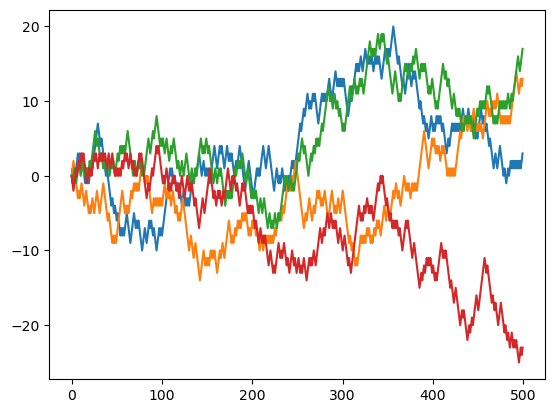

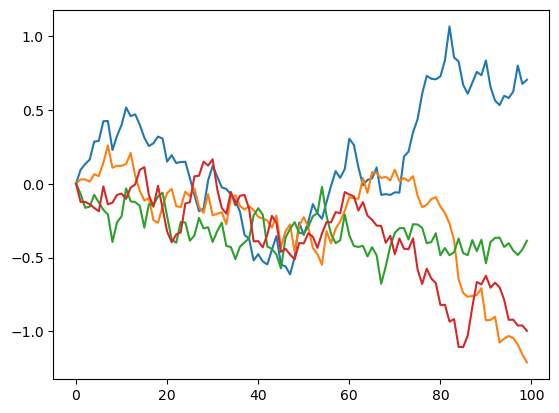

Data saved to ruths_predictions_1.csv
Data saved to ruths_predictions_2.csv
Data saved to ruths_predictions_3.csv
Data saved to ruths_predictions_4.csv
Data saved to ruths_predictions_5.csv
Data saved to ruths_predictions_6.csv
Data saved to ruths_predictions_7.csv
Data saved to ruths_predictions_8.csv


/Users/rutholotu/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1105: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/rutholotu/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1106: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


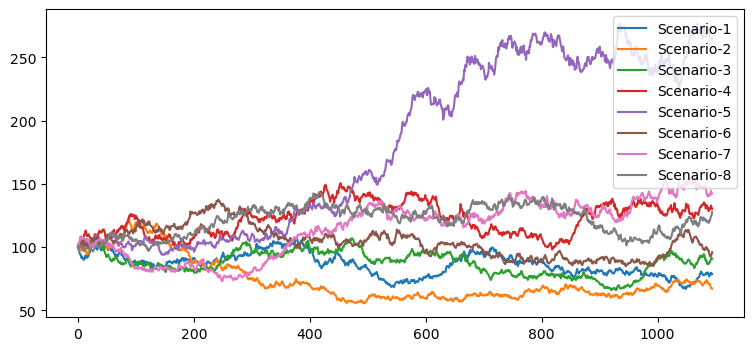

In [68]:
from matplotlib import pyplot as plt
import numpy as np
import csv

class BrownianMotion():
    def __init__(self, initial_value=0):
        assert (type(initial_value) == float or type(initial_value) == int or initial_value is None), "Expect a float or None for the initial value"
        self.initial_value = float(initial_value)
    
    def generate_random_walk(self, num_steps=500):
        if num_steps < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        random_walk = np.ones(num_steps) * self.initial_value
        for i in range(1, num_steps):
            step = np.random.choice([1, -1])
            random_walk[i] = random_walk[i-1] + step
        return random_walk
    
    def generate_normal_process(self, num_steps=100):
        if num_steps < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        normal_process = np.ones(num_steps) * self.initial_value
        scaling_factor = np.sqrt(num_steps) 
        for i in range(1, num_steps):
            step = np.random.standard_normal()
            normal_process[i] = normal_process[i-1] + (step / scaling_factor)
        return normal_process
    
    def simulate_stock_price(self, initial_stock_price=150, drift=0.15, volatility=0.5, total_time=300, time_step=1):
        num_steps = int(total_time / time_step)
        time_vector = np.linspace(0, total_time, num=num_steps)
        drift_component = (drift - ((volatility)**2 / 2)) * time_vector
        brownian_motion = volatility * self.generate_normal_process(num_steps) 
        stock_prices = initial_stock_price * (np.exp(drift_component + brownian_motion))
        return time_vector, stock_prices
    
    def save_to_csv(self, data, filename='data.csv'):
        with open(filename, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Time', 'Value'])
            for row in data:
                writer.writerow(row)
        print(f"Data saved to {filename}")

# Create BrownianMotion instances
bm1 = BrownianMotion()
for i in range(4):
    plt.plot(bm1.generate_random_walk(500))
plt.show()

bm2 = BrownianMotion()
for i in range(4):
    plt.plot(bm2.generate_normal_process(100))
plt.show()

def plot_simulated_stock_prices(initial_stock_price, drift, volatility, total_time,time_step ):
    plt.figure(figsize=(9, 4))
    for i in range(8):
        time_vector, stock_prices = bm2.simulate_stock_price(initial_stock_price= initial_stock_price, drift=drift, volatility=volatility, total_time=total_time, time_step=time_step)
        plt.plot(stock_prices)
        bm2.save_to_csv(zip(time_vector, stock_prices), f'ruths_predictions_{i+1}.csv')
    plt.legend(['Scenario-' + str(i) for i in range(1, 9)], loc='upper right')
    plt.hlines(y=None, xmin=0, xmax=365, linestyle='--', color='k')
    plt.show()


plot_simulated_stock_prices(initial_stock_price= 100, drift=0.1, volatility=0.4, total_time=3, time_step=1/365)